
# The project

The goal is to visualize the University of Rennes 1 timetable.

The data scraped from: https://planning.univ-rennes1.fr

Possible Features :

- [ ] Visualize working hours 
- [ ] Visualize Rooms occupation
- [ ] Visualize the campus heat map
- [ ] Predict the population at a given time

# The parsing

In [2]:
import pandas as pd
import icalendar
import matplotlib.pyplot as plt

In [3]:
# Read the iCalendar file
with open('data/ADECal.ics', 'rb') as f:
    cal_data = f.read()

# Parse the iCalendar object (Very time consuming)
cal = icalendar.Calendar.from_ical(cal_data)
events = cal.walk('VEVENT')

In [4]:
# show the field names of an event
list(events[0].keys())

['DTSTAMP',
 'DTSTART',
 'DTEND',
 'SUMMARY',
 'LOCATION',
 'DESCRIPTION',
 'UID',
 'CREATED',
 'LAST-MODIFIED',
 'SEQUENCE']

In [5]:
# Define the parse_event utility function
# In here we can define what to keep from the event
# Possible fields are:
# ['DTSTAMP', 'DTSTART', 'DTEND', 'SUMMARY', 'LOCATION', 'DESCRIPTION', 'UID', 'CREATED', 'LAST-MODIFIED', 'SEQUENCE']
def parse_event(event):
    row = {}
    row['start_time'] = event['DTSTART'].dt
    row['end_time'] = event['DTEND'].dt
    row['summary'] = event['SUMMARY']
    row['description'] = event['DESCRIPTION']
    row['location'] = event.get('LOCATION', None)
    return row

In [6]:
# Extract event details
data = [parse_event(event) for event in events]

# Create a DataFrame
df = pd.DataFrame(data)

In [7]:
df.head()

,start_time,end_time,summary,description,location
0,2023-03-23 10:15:00+00:00,2023-03-23 11:45:00+00:00,Cristallo TD 1C MP,\n\n1C MP\nR2.09 Structures des matériaux\nDUR...,B06 - 123
1,2023-04-11 08:30:00+00:00,2023-04-11 10:00:00+00:00,P2 - CM - Chimie Organique,\n\nP2 - DFGSP2\nPOREE François-Hugues\nBrigit...,B02 - Amphi B (005)
2,2023-01-13 07:00:00+00:00,2023-01-13 08:00:00+00:00,Math S2 CM 1MP,\n\nMP A1\nR2.03 Mathématiques\nLE PALUD Micka...,B03 - Amphi 1 (007)
3,2023-05-02 15:00:00+00:00,2023-05-02 16:30:00+00:00,TP BCEL Projet,\n\nGR17-L.AS (37)\nBiologie de la cellule\nEn...,"B29 - Biologie cellulaire (025),B29 - Biologie..."
4,2023-02-03 12:45:00+00:00,2023-02-03 15:45:00+00:00,Transfert thermiques TP 1A2 MP,\n\n1A2 MP\nR2.12 Transferts thermiques\nPERRI...,B06 - TP Thermo (012)


# Feature : Visualize activity per hour, day, week

Text(0.5, 1.1, 'Hours heatmap of UR1 (2022-2023)')

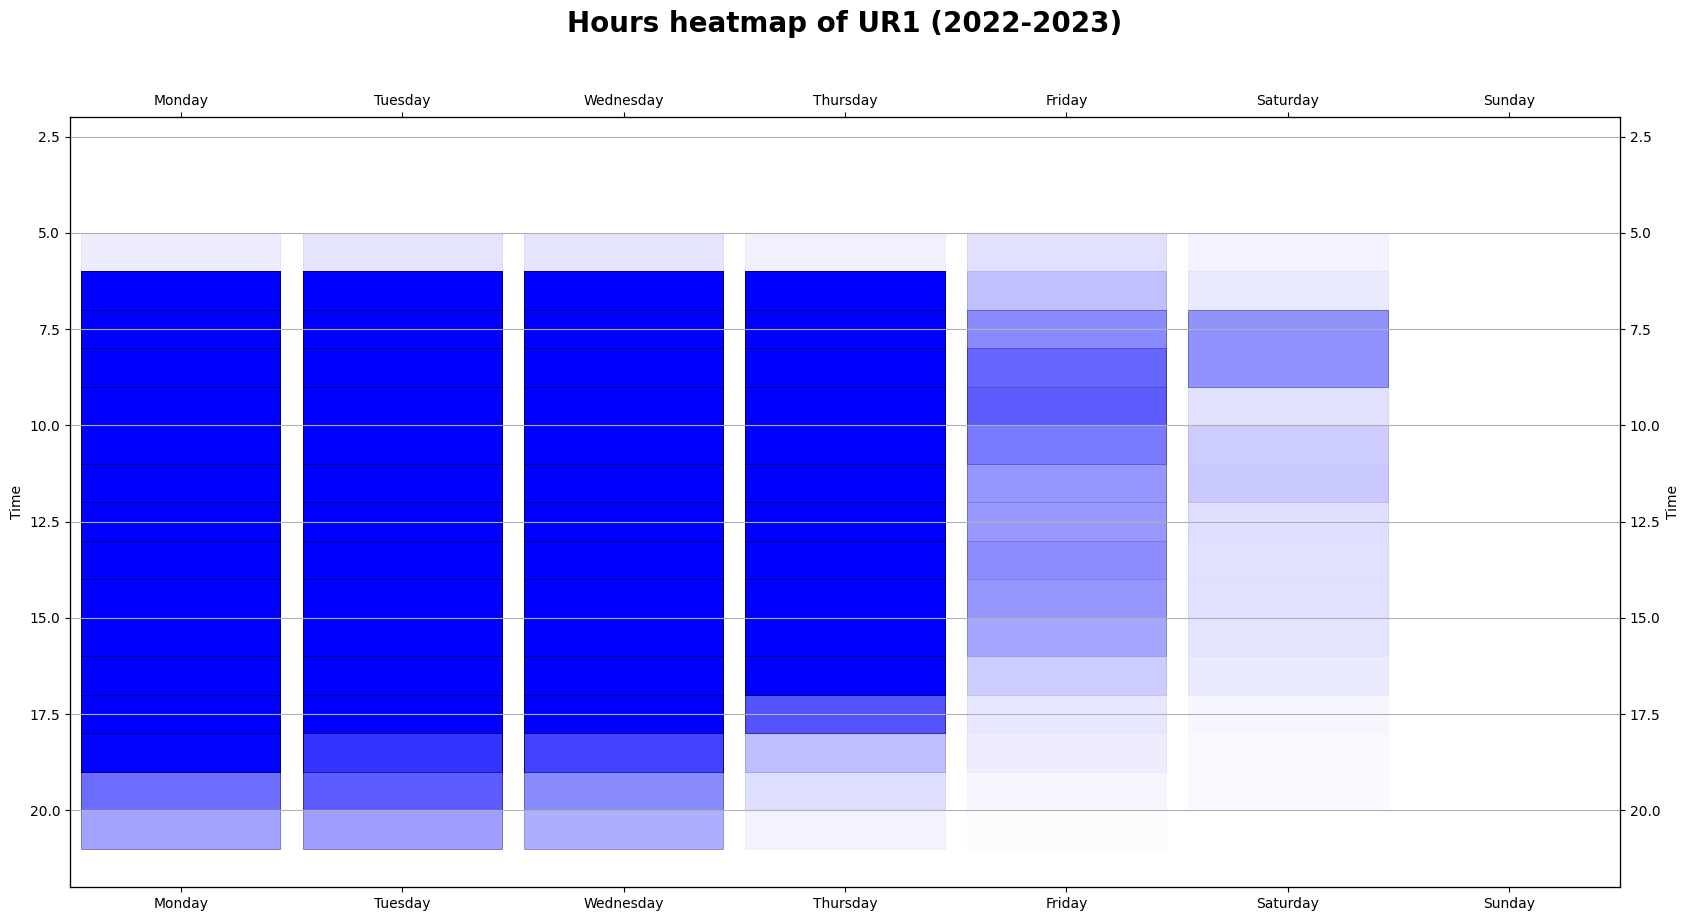

In [17]:

day_to_index = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# Plot the events
for event in df.itertuples():
    data=""
    day = event.start_time.day_name()
    if day not in day_to_index:
        print('Day {0} not found'.format(day))
        continue
    day_index = day_to_index[day]
    start_hour = event.start_time.hour
    end_hour = event.end_time.hour
    # plot event
    ax.fill_between([day_index-.45, day_index+.45], [start_hour, start_hour], [end_hour,end_hour], color="b",  alpha=.01,  edgecolor='k', linewidth=0.5)
    
    # plot event count in this box
    # plt.text(day_index, (start_hour+end_hour)*0.5, data, ha='center', va='center', fontsize=7, color='w')


# Set Axis
ax.yaxis.grid()
ax.set_ylim(22, 2)
ax.set_ylabel('Time')
ax.set_xlim(0.5,len(day_to_index)+0.5)
ax.set_xticks(range(1,len(day_to_index)+1))
ax.set_xticklabels(day_to_index.keys())

# Set Second Axis
ax2=ax.twiny().twinx()
ax2.set_xlim(ax.get_xlim())
ax2.set_ylim(ax.get_ylim())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(day_to_index.keys() )
ax2.set_ylabel('Time')

plt.title("Hours heatmap of UR1 (2022-2023)", fontsize=20, fontweight='bold', y=1.10)